In [1]:
import numpy as np
import scipy.fft
import matplotlib.pyplot as plt
from scipy.io import loadmat
import utils as ut
import math

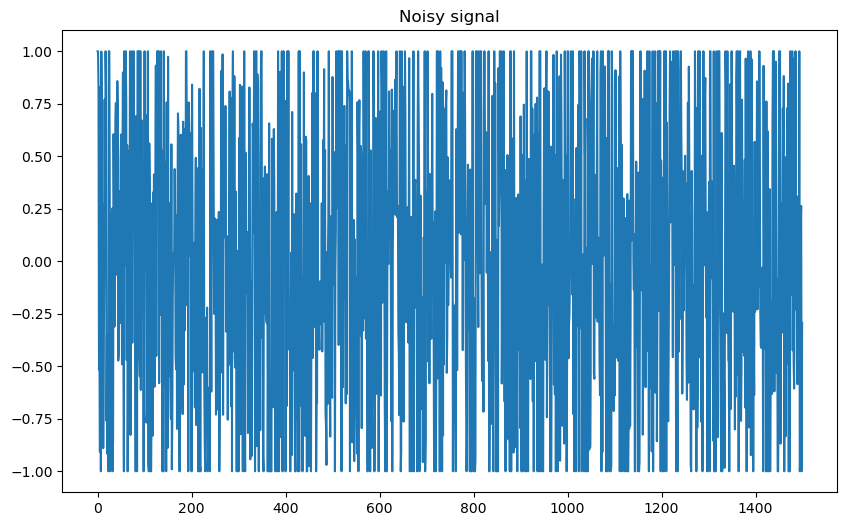

In [2]:
# Load and plot the noisy signal
x = np.load('./data/noisy_dataS_Cr2_noise=0.8_Tmax=1500_overlap=0.2_dt=1.0_ff=0.2_left_right.npy')
plt.figure(figsize=(10, 6))
plt.plot(x.real)
plt.title("Noisy signal")
plt.show()

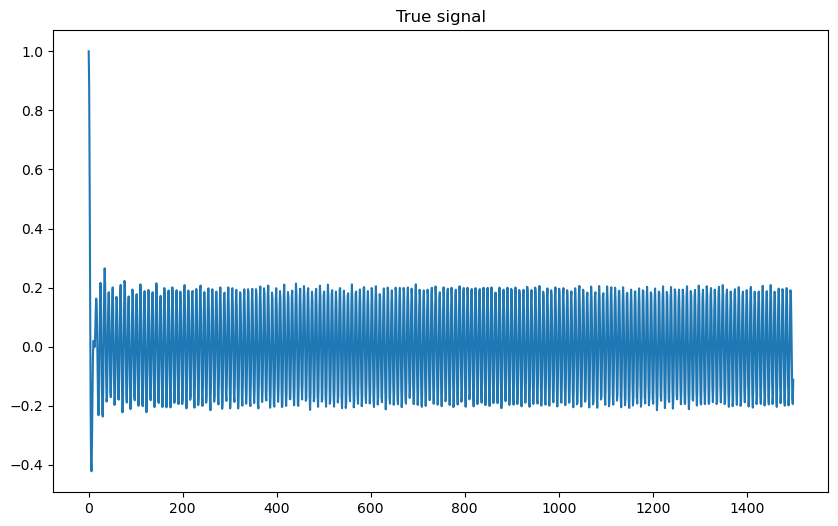

In [3]:
# Load and plot the true signal
x_true = np.load('./data/noiseless_dataS_Cr2_noise=0.01_Tmax=1500_overlap=0.2_dt=1.0_ff=0.2_left_right.npy')
#x_true = np.load('./data/noiseless_dataS_Cr2_noise=0.01_Tmax=350_overlap=0.2_dt=1.0_ff=0.2_left_right_depolarized_gamma=0.01.npy')
plt.figure(figsize=(10, 6))
plt.plot(x_true.real)
plt.title("True signal")
plt.show()

Text(0.5, 1.0, 'Comparison of signals')

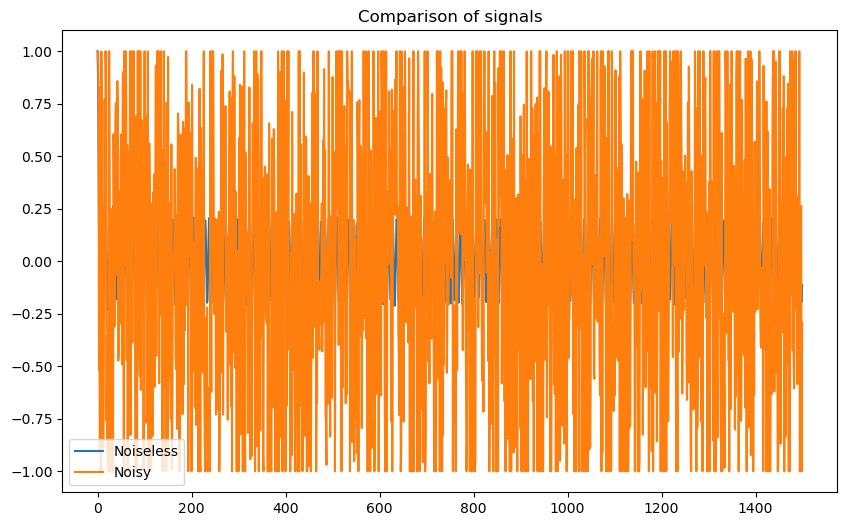

In [4]:
# Compare all signals
plt.figure(figsize=(10, 6))
plt.plot(x_true.real)
plt.plot(x.real)
plt.legend(['Noiseless', 'Noisy'])
plt.title("Comparison of signals")

In [5]:
print('MAE: ', np.mean(np.abs(x_true.real - x.real)))

MAE:  0.5559773521563144


In [6]:
# FFT
X_fft = scipy.fft.fft(x[:].real)
X_fft_shifted = scipy.fft.fftshift(X_fft)
frequencies = scipy.fft.fftshift(scipy.fft.fftfreq(len(x), d=1))[:]

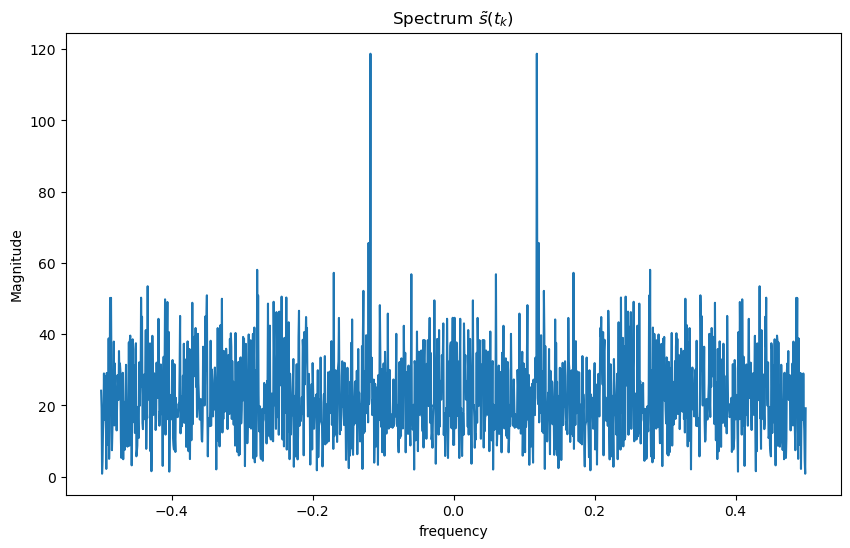

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(X_fft_shifted[:]))
plt.title(r"Spectrum $\tilde{s}(t_k)$")
plt.ylabel("Magnitude")
plt.xlabel('frequency')
plt.show()

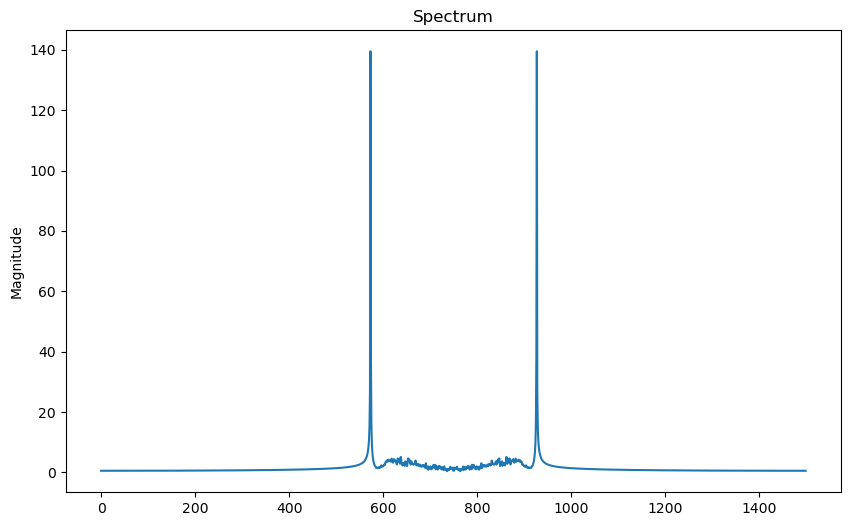

In [8]:
# FFT
X_fft_true = scipy.fft.fft(x_true.real)
X_fft_true_shifted = scipy.fft.fftshift(X_fft_true)
plt.figure(figsize=(10, 6))
plt.plot(np.abs(X_fft_true_shifted[:]))
#plt.plot(np.abs(X_fft_filtered[:]))
#plt.plot(np.abs(X_fft_shifted[:]))
plt.title("Spectrum")
plt.ylabel("Magnitude")
plt.show()

In [9]:
# Thresholding
threshold_factor = 4.5
threshold = threshold_factor * np.median(np.abs(X_fft_shifted))

In [10]:
# Zero out frequencies below the threshold
X_fft_filtered = X_fft_shifted * (np.abs(X_fft_shifted) > threshold)
# IFFT to obtain the denoised signal
x_denoised = scipy.fft.ifft(scipy.fft.ifftshift(X_fft_filtered))
# We know s(0) = 1 
x_denoised[0] = 1

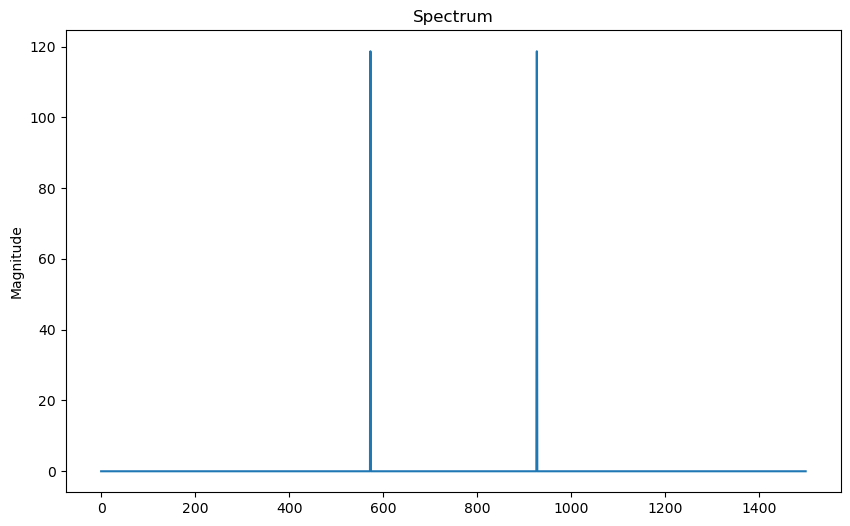

In [11]:
plt.figure(figsize=(10, 6))
plt.plot( np.abs(X_fft_filtered[:]))
plt.title("Spectrum")
plt.ylabel("Magnitude")
plt.show()

MAE (GT):  0.052510036457248985
MAE (N):  0.559324879021917
MAE (N-GT):  0.5559773521563144


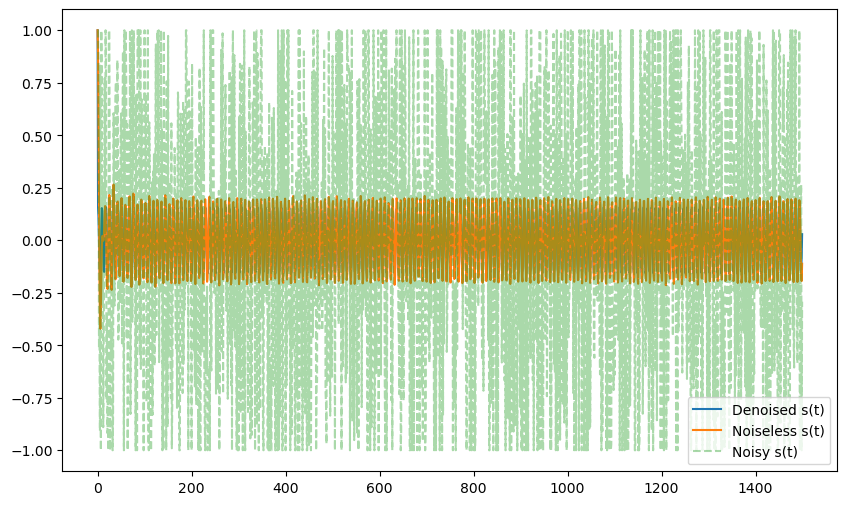

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(x_denoised.real, label="Denoised s(t)")
plt.plot(x_true.real, label="Noiseless s(t)")
plt.plot(x.real, alpha=0.4, label="Noisy s(t)", linestyle='--')
plt.legend()
# MAE
print('MAE (GT): ', np.mean(np.abs(x_denoised.real - x_true.real)))
print('MAE (N): ', np.mean(np.abs(x.real - x_denoised.real)))
print('MAE (N-GT): ', np.mean(np.abs(x.real - x_true.real)))